# West Nile Virus(WNV)detection 

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KernelDensity
from shapely.geometry import Point, Polygon
import warnings 
warnings.filterwarnings('ignore')

Loading given datasets in the python cell

In [155]:
#load  the date
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
weather = pd.read_csv("weather.csv")
spray = pd.read_csv("spray.csv")


Analysis of train data

In [156]:
train.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,5/29/2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,5/29/2007,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,5/29/2007,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,5/29/2007,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,5/29/2007,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [157]:
#rows and cloumns in the training dataset
train.shape

(10506, 12)

In [158]:
train.info

<bound method DataFrame.info of             Date                                            Address  \
0      5/29/2007  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1      5/29/2007  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2      5/29/2007  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3      5/29/2007    7900 West Foster Avenue, Chicago, IL 60656, USA   
4      5/29/2007    7900 West Foster Avenue, Chicago, IL 60656, USA   
...          ...                                                ...   
10501  9/26/2013      5100 West 72nd Street, Chicago, IL 60638, USA   
10502  9/26/2013    5800 North Ridge Avenue, Chicago, IL 60660, USA   
10503  9/26/2013  1700 North Ashland Avenue, Chicago, IL 60622, USA   
10504  9/26/2013   7100 North Harlem Avenue, Chicago, IL 60631, USA   
10505  9/26/2013      4200 West 65th Street, Chicago, IL 60621, USA   

                      Species  Block           Street  Trap  \
0      CULEX PIPIENS/RESTUANS     41   N OAK PARK AV

In [159]:
#do we have any null values in the dataset?
train.isnull().sum(axis=0)

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [160]:
#change datecolumn to datetime
train['Date'] = pd.to_datetime(train['Date'])
display(train.Date.sort_values().head(1))

0   2007-05-29
Name: Date, dtype: datetime64[ns]

How often does city of Chicago count the mosquiotes?

In [161]:
print(train['Date'].dt.year.unique())
print(train['Date'].dt.month.unique())
print(train['Date'].dt.day.unique())
print (len(train.Date.unique()))

[2007 2009 2011 2013]
[ 5  6  7  8  9 10]
[29  5 26  2 11 18 19 25 27  1  3  7  8  9 15 16 17 21 22 24 28  4  6 12
 10 13 31 14 30 23]
95


From the above data we can see that the city of Chicago conducted the srvey on every 2 month from 2007 to 2013. It also shows that the surveys were mostly done between the month of may and october for 95 days.

In [162]:
In how many unique location did the city of Chicago collect the sample?

Object `sample` not found.


In [ ]:
In how many unique location did the city of Chicago collect the sample

In [163]:
#dictinct address
print(len(train.Address.unique()))
train.Address.value_counts().head()


138


ORD Terminal 5, O'Hare International Airport, Chicago, IL 60666, USA    750
South Doty Avenue, Chicago, IL, USA                                     542
South Stony Island Avenue, Chicago, IL, USA                             314
4100 North Oak Park Avenue, Chicago, IL 60634, USA                      185
4200 West 127th Street, Alsip, IL 60803, USA                            183
Name: Address, dtype: int64

In [164]:
len(train.Trap.unique())

136

Mosquiotoes samples were collected from 136 unique areas in the city.

In [166]:
#trap id value counts
train.Trap.value_counts().head()

T900    750
T115    542
T138    314
T002    185
T135    183
Name: Trap, dtype: int64

problem?
We have 138 unique locations and only 136 trap ids. We need to figure out if a single trap id has more than 1 location.


In [167]:
Trap_address=train.groupby('Trap')['Address'].nunique()
Trap_address[Trap_address>1]

Trap
T009    2
T035    2
Name: Address, dtype: int64

As we can see the trap id T009 and T005 have 2 different locations. We need to find out what are they?

In [168]:
train[train.Trap=='T009'].Address.unique()

array(['9100 West Higgins Avenue, Chicago, IL 60656, USA',
       '9100 West Higgins Road, Rosemont, IL 60018, USA'], dtype=object)

In [169]:
train[train.Trap=='T005'].Address.unique()

array(['6000 West Roscoe Street, Chicago, IL 60634, USA'], dtype=object)

In [170]:
#distinct street
print(len(train.Street.unique()))

128


In [171]:
train.Street.value_counts().head()

 W OHARE AIRPORT       750
 S DOTY AVE            542
 S STONY ISLAND AVE    347
 S ASHLAND AVE         266
 N OAK PARK AVE        216
Name: Street, dtype: int64

Checking whether WNV is present or not

In [172]:
display(train.WnvPresent.value_counts())

0    9955
1     551
Name: WnvPresent, dtype: int64

How many species of mosquitos are present in the survey?

In [173]:
len(train.Species.unique())

7

There are altogether 7 species present in the survey.

Count the value of each species.

In [174]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

Find the percent of each species in the sample collected by the city of chicago.

In [175]:
Species_count = train.Species.value_counts()
Species_wnv = train.groupby('Species')['WnvPresent'].sum().sort_values(ascending = False)
Species_count = Species_count.to_frame().join(Species_wnv.to_frame())
Species_count = Species_count.rename(columns = {'Species' : 'Sample', 'WnvPresent' : 'Wnv_sample'})
Species_count ['Wnv_percent'] = Species_count.Wnv_sample*100/Species_count.Sample
Species_count.reset_index(inplace = True)
Species_count = Species_count.rename(columns = {'index': 'Species'})
Species_count.sort_values(by = 'Wnv_percent', ascending = False)


,Species,Sample,Wnv_sample,Wnv_percent
2,CULEX PIPIENS,2699,240,8.892182
0,CULEX PIPIENS/RESTUANS,4752,262,5.513468
1,CULEX RESTUANS,2740,49,1.788321
3,CULEX TERRITANS,222,0,0.000000
4,CULEX SALINARIUS,86,0,0.000000
5,CULEX TARSALIS,6,0,0.000000
6,CULEX ERRATICUS,1,0,0.000000


Among the 7 species of mosquitoes, 4 of them do not contain WNV virus on them. Whereas, out of thre infected samples CLUEX PIPIENS species are the most infected (around 9%) of the sample followed by CULEX PIPIENS/RESTUANS with around 5% of the sample. 

Plot the Species by number and percent

TypeError: 'str' object is not callable

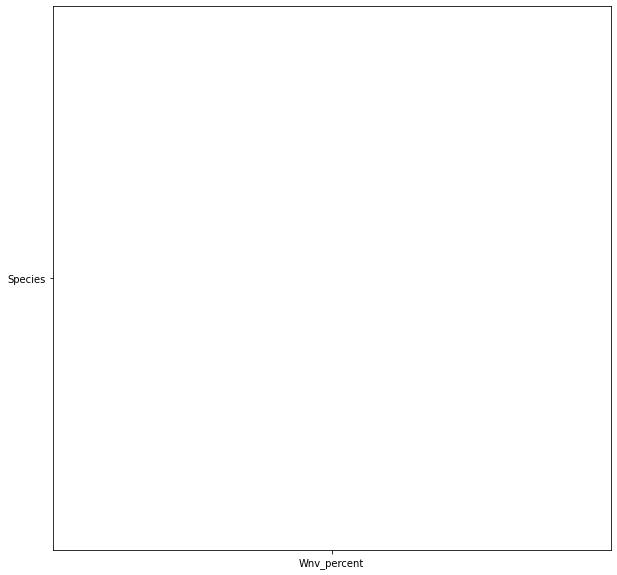

In [176]:
plt.figure(figsize=(10,10))
plt.barh('Species','Wnv_percent')
plt.title("Total percentage of WNV present in different species")
plt.show()


In [178]:
#WNV prazesent in percentage
display(train.WnvPresent.value_counts()/ len(train.WnvPresent))

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

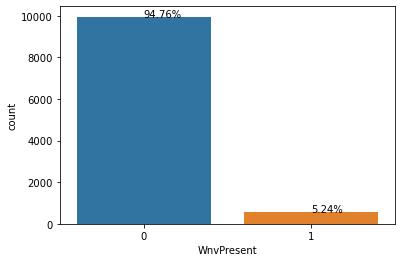

In [179]:
#plot
fig,  ax = plt.subplots(1,1)
sns.countplot(train['WnvPresent'], ax = ax)
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height,'{:.2f}{}'.format(height/len(train)*100,'%'))
plt.show()

In [180]:
#train.value_counts()

Find out the percentage of WNV present in sample mosquitos by area.

In [181]:
#Computing percentage of wnv present in the moquitos counted at the given address 
Address_count=train.Address.value_counts()
Address_wnv=train.groupby('Address')['WnvPresent'].sum().sort_values(ascending=True)
Address_count=Address_count.to_frame().join(Address_wnv.to_frame())
Address_count = Address_count.rename(columns={'Address': 'Sample', 'WnvPresent': 'Wnv_sample'})
Address_count['Wnv_percent']=Address_count.Wnv_sample*100/Address_count.Sample
Address_count.sort_values(by='Wnv_percent',ascending=False).head()

,Sample,Wnv_sample,Wnv_percent
"6500 North Oak Park Avenue, Chicago, IL 60631, USA",31,6,19.354839
"6000 North Avondale Avenue, Chicago, IL 60631, USA",24,4,16.666667
"6000 West Roscoe Street, Chicago, IL 60634, USA",14,2,14.285714
"7100 North Harlem Avenue, Chicago, IL 60631, USA",50,7,14.000000
"6400 West Strong Street, Chicago, IL, USA",30,4,13.333333


From the above table we can see that mosquitos sample collected from 6500 North Oak Park Avenue area contains the highest percent of WNV (19.35%) followed by 6000 North Avondale Avenue which has 16.9% of WNV present in collected samples.        

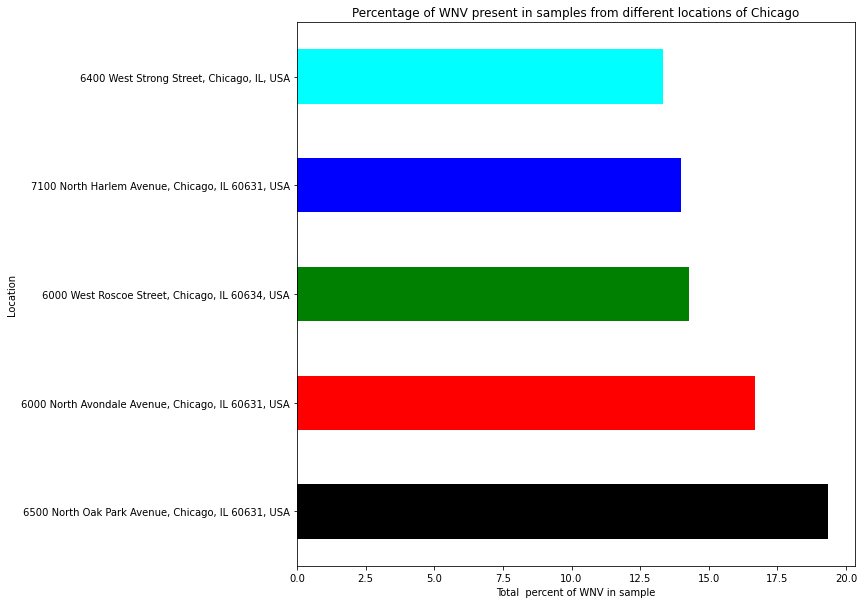

In [182]:
Address_count.Wnv_percent.sort_values(ascending= False).head(5).plot(kind='barh', figsize=(10, 10),  color=['black', 'red', 'green', 'blue', 'cyan'] ,  title='Percentage of WNV present in samples from different locations of Chicago')
plt.xlabel('Total  percent of WNV in sample')
plt.ylabel('Location')
plt.show()

# Weather data

In [183]:
weather.head(5)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,5/1/2007,83,50,67,14,51,56,0,2,...,,0,M,0,0,29.1,29.82,1.7,27,9.2
1,2,5/1/2007,84,52,68,M,51,57,0,3,...,,M,M,M,0,29.18,29.82,2.7,25,9.6
2,1,5/2/2007,59,42,51,-3,42,47,14,0,...,BR,0,M,0,0,29.38,30.09,13.0,4,13.4
3,2,5/2/2007,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0,29.44,30.08,13.3,2,13.4
4,1,5/3/2007,66,46,56,2,40,48,9,0,...,,0,M,0,0,29.39,30.12,11.7,7,11.9


In [198]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [187]:
#check the missing values
weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [194]:
weather.isin(['?']).sum(axis=0)

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [196]:
weather.isin(['0']).sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
Depart           74
DewPoint          0
WetBulb           0
Heat           1870
Cool           1147
Sunrise           0
Sunset            0
CodeSum           0
Depth          1472
Water1            0
SnowFall       1459
PrecipTotal    1577
StnPressure       0
SeaLevel          0
ResultSpeed       0
ResultDir         0
AvgSpeed          0
dtype: int64

In [197]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result